#**Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#**Data Loading and Understanding**


In [ ]:
data = pd.DataFrame()
file_data = pd.read_csv('/content/drive/MyDrive/Student_Performance_Data /StudentsPerformance.csv')
data = data.append(file_data)
print ("data is loaded!")

data is loaded!


<ipython-input-2-cfd33fdfa3fd>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(file_data)


In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.shape

(1000, 8)

In [ ]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#**Data Checking and Cleaning**

In [ ]:
null_ctr = data.isnull().sum()
print(null_ctr)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
null_percent = round(100*(data.isnull().sum())/len(data),2)
print(null_percent)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


**Adding some relation between the marks of a student (Average is a suitable comination)**

In [ ]:
data['average'] = (data['math score'] + data['reading score'] + data['writing score'])/3
data['average'] = [int(x) for x in data['average']]
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


#**Data Exploration**

##**Question 1**

In [ ]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
average                        73
dtype: int64

In [ ]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
print(len(data['race/ethnicity'].unique()))
print(data['race/ethnicity'].unique())

5
['group B' 'group C' 'group A' 'group D' 'group E']


In [ ]:
print(len(data['parental level of education'].unique()))
print(data['parental level of education'].unique())

6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [ ]:
print(len(data['lunch'].unique()))
print(data['lunch'].unique())

2
['standard' 'free/reduced']


In [ ]:
print(len(data['test preparation course'].unique()))
print(data['test preparation course'].unique())

2
['none' 'completed']


##**Question 2**

In [ ]:
print(len(data[(data['gender'] == 'female') & (data['math score'] >= 60) & (data['reading score'] >= 60) & (data['writing score'] >= 60)]))

319


In [ ]:
temp_data = data[(data['gender'] == 'female') & (data['math score'] >= 60) & (data['reading score'] >= 60) & (data['writing score'] >= 60)]
len(temp_data[temp_data['gender']=='female'])

319

In [ ]:
# let's check:
print(temp_data.describe())

       math score  reading score  writing score     average
count  319.000000     319.000000     319.000000  319.000000
mean    73.137931      80.786834      80.890282   77.943574
std      9.508674       9.440563       9.299888    8.904275
min     60.000000      60.000000      61.000000   62.000000
25%     65.000000      74.000000      74.000000   71.500000
50%     71.000000      80.000000      80.000000   77.000000
75%     79.000000      87.500000      87.500000   84.000000
max    100.000000     100.000000     100.000000  100.000000


In [ ]:
print("Total number of females:", len(data[(data['gender'] == 'female')]))
print("Percentage of the females who passed from the total number of females:", \
      100 * len(temp_data[(temp_data['gender'] == 'female')])/len(data[(data['gender'] == 'female')]))

Total number of females: 518
Percentage of the females who passed from the total number of females: 61.58301158301158


In [ ]:
print(len(data[(data['gender'] == 'male') & (data['math score'] >= 60) & (data['reading score'] >= 60) & (data['writing score'] >= 60)]))

284


In [ ]:
temp_data = data[(data['gender'] == 'male') & (data['math score'] >= 60) & (data['reading score'] >= 60) & (data['writing score'] >= 60)]
len(temp_data[temp_data['gender']=='male'])

284

In [ ]:
# let's check:
print(temp_data.describe())

       math score  reading score  writing score     average
count  284.000000     284.000000      284.00000  284.000000
mean    77.714789      74.651408       72.78169   74.742958
std      9.592381       8.625808        8.56661    8.265095
min     60.000000      60.000000       60.00000   60.000000
25%     70.000000      67.750000       66.00000   68.000000
50%     77.000000      74.000000       72.00000   73.500000
75%     85.000000      81.000000       78.00000   80.000000
max    100.000000     100.000000      100.00000  100.000000


In [ ]:
print("Total number of males:", len(data[(data['gender'] == 'male')]))
print("Percentage of the males who passed from the total number of males:", \
      100 * len(temp_data[(temp_data['gender'] == 'male')])/len(data[(data['gender'] == 'male')]))

Total number of males: 482
Percentage of the males who passed from the total number of males: 58.92116182572614


##**Question 3**

In [ ]:
temp_data = data[(data['test preparation course'] == 'completed') & (data['math score'] < 60) & (data['reading score'] < 60) & (data['writing score'] < 60)]
print("Num of students completed preparetion course:", len(data[data['test preparation course']=='completed']))
print("Num of students completed preparetion course and failed: ", len(temp_data[temp_data['test preparation course']=='completed']))
print("Percentage: ", 100*len(temp_data[temp_data['test preparation course']=='completed'])/len(data[data['test preparation course']=='completed']))

Num of students completed preparetion course: 358
Num of students completed preparetion course and failed:  37
Percentage:  10.335195530726256


##**Question 4**

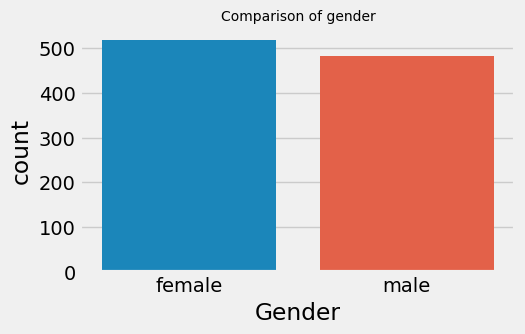

In [ ]:
plt.rcParams['figure.figsize'] = (5, 3)
sns.countplot(data=data,x=data['gender'])
plt.title('Comparison of gender', fontweight = 20, fontsize = 10)
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

In [ ]:
data_temp = data.groupby('gender').agg('mean')
data_temp

<ipython-input-67-ba37c7f3eead>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_temp = data.groupby('gender').agg('mean')


,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.239382
male,68.728216,65.473029,63.311203,65.516598


<ipython-input-111-5158e843259e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('gender').agg('mean').plot(kind='barh',figsize=(4,4))


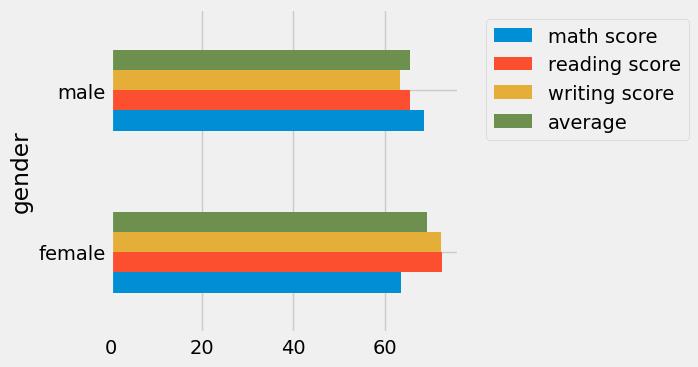

In [ ]:
data.groupby('gender').agg('mean').plot(kind='barh',figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

##**Question 5**

In [ ]:
data_temp = data.groupby('race/ethnicity')['race/ethnicity'].count()
print(data_temp)

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64


##**Question 6**

In [ ]:
data_temp = data[(data['math score'] >= 60) & (data['reading score'] >= 60) & (data['writing score'] >= 60)].\
groupby('parental level of education')['parental level of education'].count()
print(data_temp.sort_values(ascending = False))

parental level of education
some college          144
associate's degree    135
high school           100
some high school       99
bachelor's degree      84
master's degree        41
Name: parental level of education, dtype: int64


##**Question 7**

In [ ]:
data_temp = data[(data['math score'] >= 60) & (data['reading score'] >= 60) & (data['writing score'] >= 60)].\
groupby('lunch')['lunch'].count()
print(data_temp.sort_values(ascending = False))
print("Percentage Passed-Standard Luch: ", 100* data_temp['standard'] / len(data[data['lunch']=='standard']))
print("Percentage Passed-free/reduced: ", 100* data_temp['free/reduced'] / len(data[data['lunch']=='free/reduced']))

lunch
standard        448
free/reduced    155
Name: lunch, dtype: int64
Percentage Passed-Standard Luch:  69.45736434108527
Percentage Passed-free/reduced:  43.66197183098591


##**Question 8**

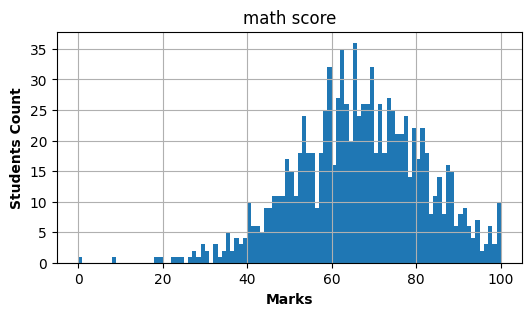

In [ ]:
ax = data.hist(column='math score', bins=100, figsize=(6,3))
ax = ax[0]
for x in ax:
    x.set_xlabel("Marks", weight='bold')
    x.set_ylabel("Students Count", weight='bold')

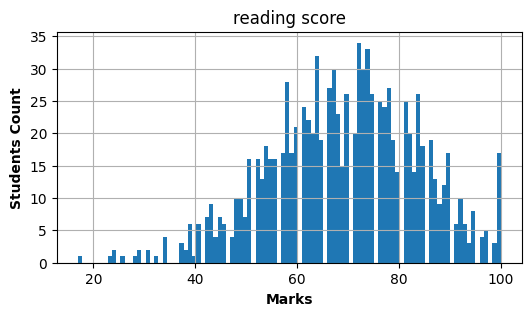

In [ ]:
ax = data.hist(column='reading score', bins=100, figsize=(6,3))
ax = ax[0]
for x in ax:
    x.set_xlabel("Marks", weight='bold')
    x.set_ylabel("Students Count", weight='bold')

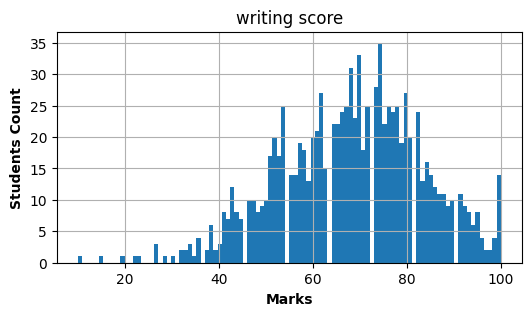

In [ ]:
ax = data.hist(column='writing score', bins=100, figsize=(6,3))
ax = ax[0]
for x in ax:
    x.set_xlabel("Marks", weight='bold')
    x.set_ylabel("Students Count", weight='bold')

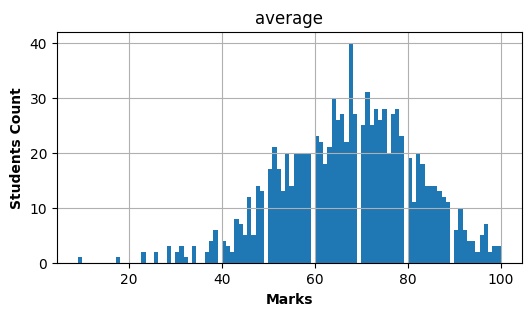

In [ ]:
ax = data.hist(column='average', bins=100, figsize=(6,3))
ax = ax[0]
for x in ax:
    x.set_xlabel("Marks", weight='bold')
    x.set_ylabel("Students Count", weight='bold')

##**Question 9**

Text(0.5, 0, 'Mark')

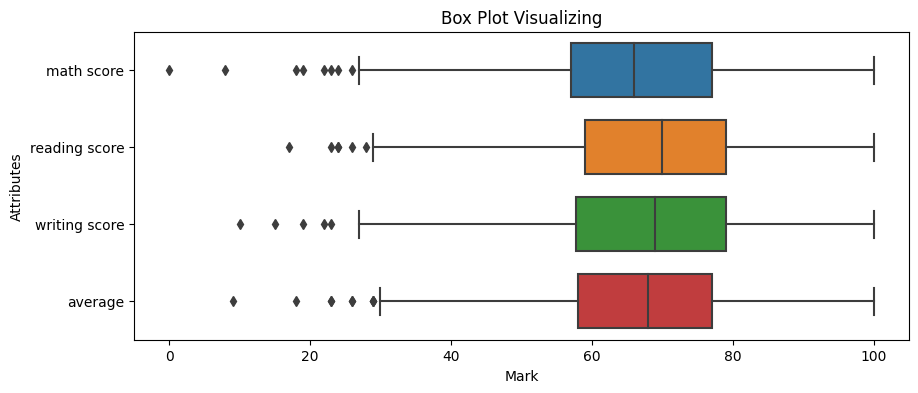

In [ ]:
attributes = ['math score', 'reading score', 'writing score', 'average']
plt.rcParams['figure.figsize'] = [10, 4]
sns.boxplot(data = data[attributes], orient='h', whis=1.5, width=0.7)
plt.title("Box Plot Visualizing")
plt.ylabel("Attributes")
plt.xlabel("Mark")

##**Question 10**

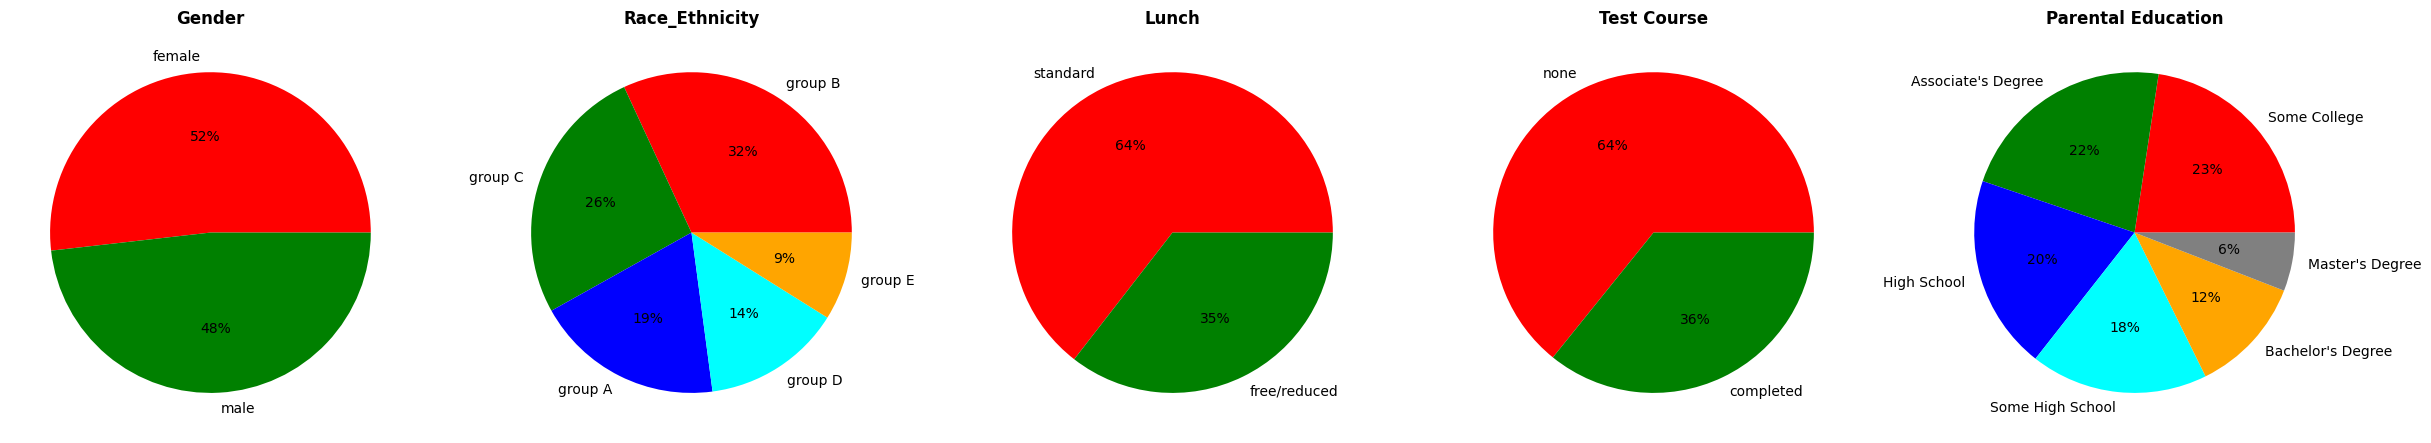

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = list(data['gender'].unique())
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '%1.0f%%')
plt.title('Gender', fontweight='bold')

plt.subplot(1, 5, 2)
size = data['race/ethnicity'].value_counts()
labels = list(data['race/ethnicity'].unique())
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '%1.0f%%')
plt.title('Race_Ethnicity', fontweight='bold')

plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = list(data['lunch'].unique())
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '%1.0f%%')
plt.title('Lunch', fontweight='bold')

plt.subplot(1, 5, 4)
size = data['test preparation course'].value_counts()
labels = list(data['test preparation course'].unique())
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '%1.0f%%')
plt.title('Test Course',fontweight='bold')

plt.subplot(1, 5, 5)
size = data['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '%1.0f%%')
plt.title('Parental Education', fontweight='bold')

plt.show()

##**Question 11:**


###**11.1 Checking the effect of the parental level of education**

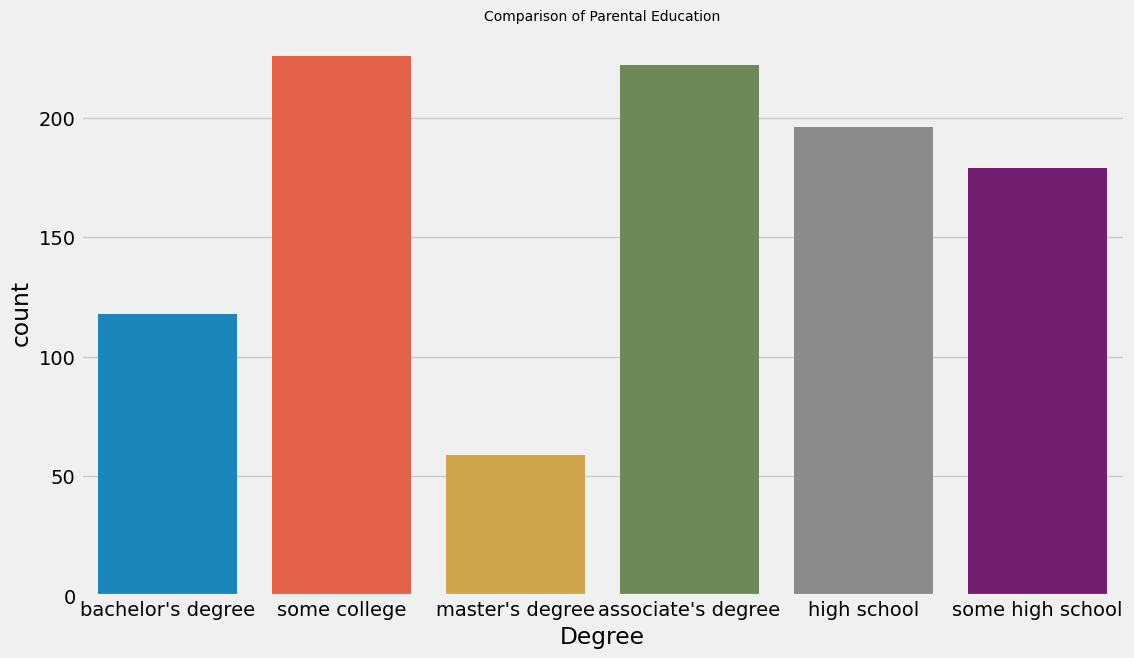

In [ ]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')
sns.countplot(data=data,x=data['parental level of education'])
plt.title('Comparison of Parental Education', fontweight = 20, fontsize = 10)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<ipython-input-107-d00b30951bee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(5,5))


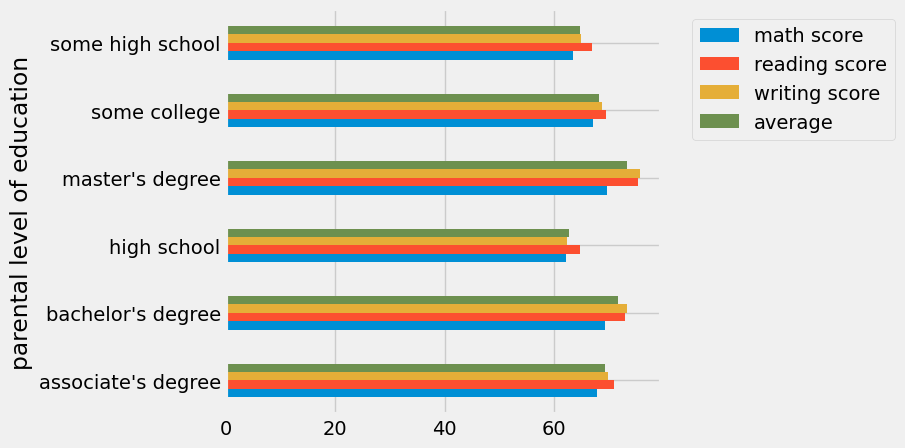

In [ ]:
data.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

###**11.2 Checking the effect of the race/ethnicity**

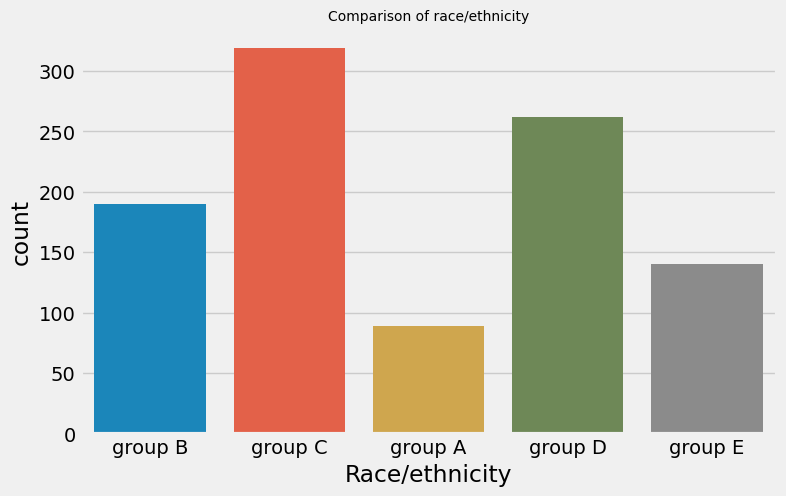

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.countplot(data=data,x=data['race/ethnicity'])
plt.title('Comparison of race/ethnicity', fontweight = 20, fontsize = 10)
plt.xlabel('Race/ethnicity')
plt.ylabel('count')
plt.show()

<ipython-input-109-b2128778a8b2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('race/ethnicity').agg('mean').plot(kind='barh',figsize=(5,5))


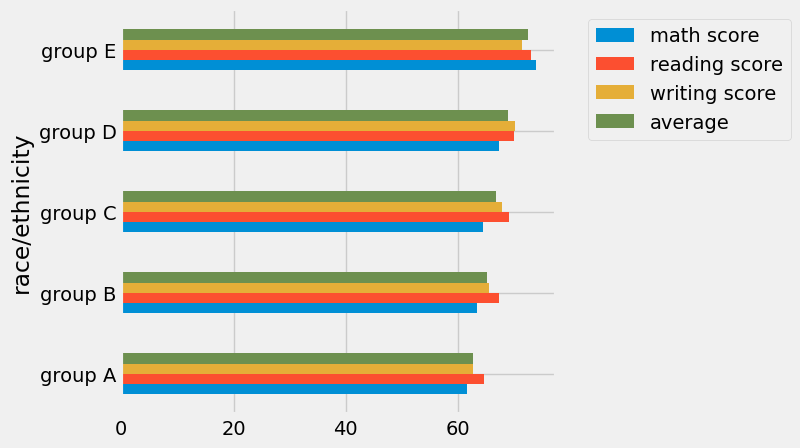

In [ ]:
data.groupby('race/ethnicity').agg('mean').plot(kind='barh',figsize=(5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

###**11.3 Checking the effect of the lunch**

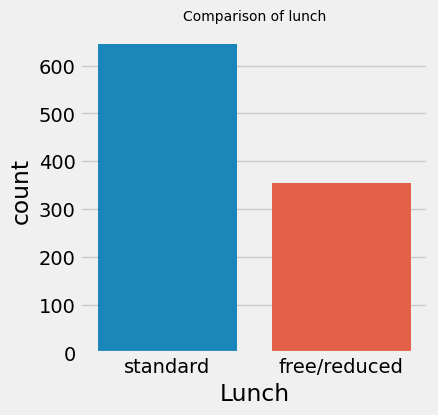

In [ ]:
plt.rcParams['figure.figsize'] = (4, 4)
sns.countplot(data=data,x=data['lunch'])
plt.title('Comparison of lunch', fontweight = 20, fontsize = 10)
plt.xlabel('Lunch')
plt.ylabel('count')
plt.show()

<ipython-input-113-662e453744fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('lunch').agg('mean').plot(kind='barh',figsize=(4,4))


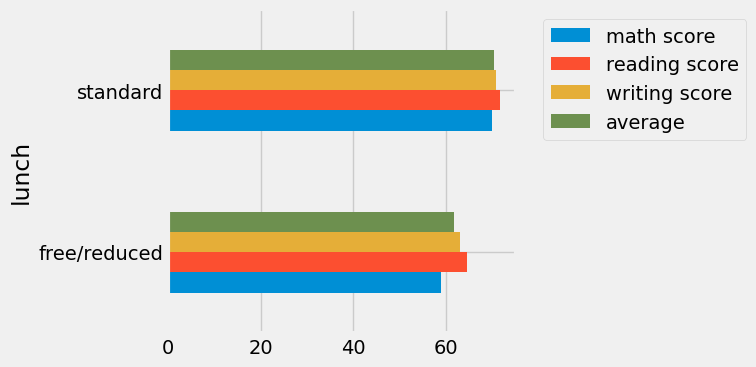

In [ ]:
data.groupby('lunch').agg('mean').plot(kind='barh',figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

###**11.4 Checking the effect of the test preparation course**

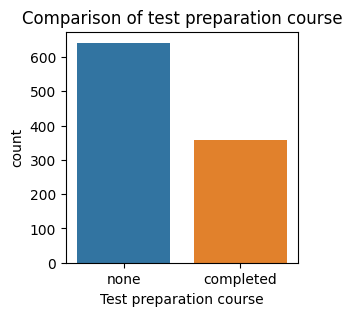

In [ ]:
plt.rcParams['figure.figsize'] = (3, 3)
sns.countplot(data=data,x=data['test preparation course'])
plt.title('Comparison of test preparation course')
plt.xlabel('Test preparation course')
plt.ylabel('count')
plt.show()

<ipython-input-64-72617a8ab97b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('test preparation course').agg('mean').plot(kind='barh',figsize=(4,4))


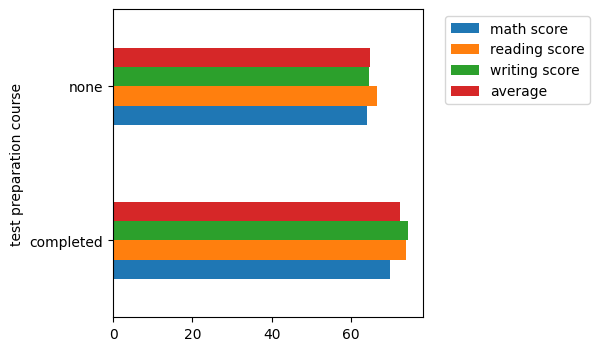

In [ ]:
data.groupby('test preparation course').agg('mean').plot(kind='barh',figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()